# Examples for the use of SmallDataAna (liquid scattering on CsPad)

In [1]:
%matplotlib notebook
%pylab
import sys
sys.path.append('/reg/d/psdm/xpp/xpptut15/results/smalldata_tools/smalldata_tools')
import SmallDataAna as sda

runNr=246
#runNr=153
ana = sda.SmallDataAna('xpp00316',runNr, dirname='/reg/d/psdm/xpp/xpptut15/results/smalldata_tools/output/')

ana.addCut('lightStatus/xray',0.5,1.5,'xon')
ana.addCut('lightStatus/xray',0.5,1.5,'on')
ana.addCut('lightStatus/laser',0.5,1.5,'on')
ana.addCut('lightStatus/xray',0.5,1.5,'off')
ana.addCut('lightStatus/laser',-0.5,0.5,'off')
    
ana.addCut('ipm3/sum',0.5,10.,'on')
ana.addCut('ipm3/sum',0.5,10.,'off')
ana.addCut('tt/AMPL',0.03,10.,'on')

encOffset=1343965.
conv=20e-9
speedLight = 2.99792458e8
encScale=2 * conv / speedLight
nEvts_per_bin_average=100

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib
and now open in dir:  /reg/d/psdm/xpp/xpptut15/results/smalldata_tools/output/  to open file  /reg/d/psdm/xpp/xpptut15/results/smalldata_tools/output//xpp00316_Run246.h5
add a new variable to Xarray:  /delay
found filename xr_delay_xpp00316_Run246.nc, added data for key delay  <xarray.DataArray 'delay' (time: 36000)>
array([ 0.256065,  0.041828,  0.101538, ...,  0.145101,  0.092752,  0.09436 ])
Coordinates:
  * time     (time) datetime64[ns] 2016-03-27T22:30:12.060127488 ...
add a new variable to Xarray:  /cspad_ROI1
found filename xr_cspad_ROI1_xpp00316_Run246.nc, added data for key cspad_ROI1  <xarray.DataArray 'cspad_ROI1' (time: 36000)>
array([  4455323.579913,   7157827.870316,    982813.999841, ...,
         2439011.799342,   3848446.156814,  14449990.559692])
Coordinates:
  * time     (time) datetime64[ns] 2016-03-27T22:30:12.060127488 ...
add a new variable to Xarray:  /cspad_ROI2
fou

cube:  cube
newDelay binned from -1.9533 to 2.21519 in 299 bins
Cut 0: 0.500000 < lightStatus/xray < 1.500000
Cut 1: 0.500000 < lightStatus/laser < 1.500000
Cut 2: 0.500000 < ipm3/sum < 10.000000
Cut 3: 0.030000 < tt/AMPL < 10.000000
Cut 4: -1.953296 < newDelay < 2.215188
we will bin:  ['ipm2/sum', 'ipm3/sum', 'diodeU/channels', 'cspad_ROI1', 'cspad_ROI2']


<IPython.core.display.Javascript object>


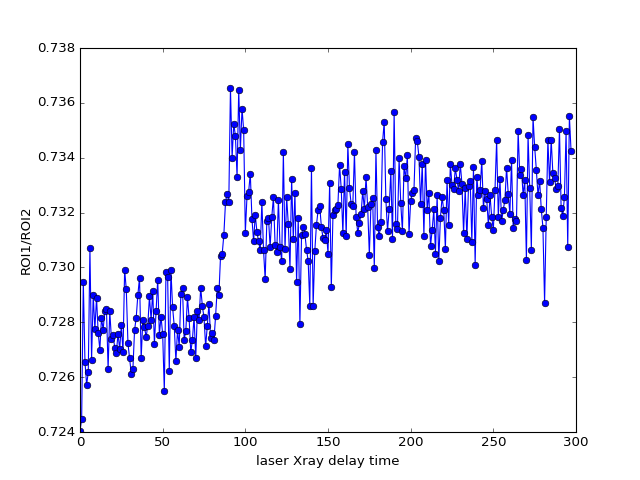

In [2]:
#update data
newDelay = (ana.xrData.enc__ch0-encOffset)*encScale*1e12 + ana.xrData.tt__ttCorr
ana.addVar('newDelay', newDelay)
nBin = ana.getFilter('on').sum()/nEvts_per_bin_average
delayMin = np.percentile(newDelay,0.5)
delayMax = np.percentile(newDelay, 99.5)
ana.addCube('cube','newDelay',np.linspace(delayMin,delayMax,nBin),'on')
#ana.addCube('cube','newDelay',np.arange(-2.,2.,0.05),'on')
#ana.xrData = ana.xrData.assign(cspad__ROI1 = (ana.xrData.cspad__ROI_0_sum + ana.xrData.cspad__ROI_1_sum)) 

cspad_ROI1 = ana.xrData.cspad__ROI_0_sum + ana.xrData.cspad__ROI_1_sum 
cspad_ROI2 = ana.xrData.cspad__ROI_2_sum + ana.xrData.cspad__ROI_3_sum + ana.xrData.cspad__ROI_4_sum 
ana.addVar('cspad_ROI1', cspad_ROI1)
ana.addVar('cspad_ROI2', cspad_ROI2)

ana.addToCube('cube',['ipm2/sum','ipm3/sum','diodeU/channels','cspad_ROI1','cspad_ROI2'])
cubeData = ana.makeCubeData('cube')

plt.figure()
plt.plot(cubeData['cspad_ROI1']/cubeData['cspad_ROI2'],'o-')
plt.xlabel('laser Xray delay time')
plt.ylabel('ROI1/ROI2')